In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('terrains_web.csv')

In [4]:
df.head()

,Field1_links,image_url,superficie,prix,adresse
0,https://sn.coinafrique.com/annonce/terrains/ve...,https://images.coinafrique.com/thumb_4817195_u...,150,6 000 000 CFA,"Diamniadio, Sénégal"
1,https://sn.coinafrique.com/annonce/terrains/te...,https://images.coinafrique.com/thumb_4777135_u...,500 m2,20 000 000 CFA,"Mbao, Dakar, Sénégal"
2,https://sn.coinafrique.com/annonce/terrains/te...,https://images.coinafrique.com/thumb_4815887_u...,150 m2,25 000 000 CFA,"Mbao, Dakar, Sénégal"
3,https://sn.coinafrique.com/annonce/terrains/te...,https://images.coinafrique.com/thumb_4815828_u...,150,4 000 000 CFA,"Keur Massar, Sénégal"
4,https://sn.coinafrique.com/annonce/terrains/te...,https://images.coinafrique.com/thumb_4815324_u...,180,4 500 000 CFA,"Dakar, Sénégal"


In [5]:
df.describe()

,Field1_links,image_url,superficie,prix,adresse
count,9323,9323,8677,9271,9271
unique,9323,9323,1060,611,93
top,https://sn.coinafrique.com/annonce/terrains/te...,https://images.coinafrique.com/thumb_4850104_u...,150,Prix sur demande,"Dakar, Sénégal"
freq,1,1,1485,681,1418


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9323 entries, 0 to 9322
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Field1_links  9323 non-null   object
 1   image_url     9323 non-null   object
 2   superficie    8677 non-null   object
 3   prix          9271 non-null   object
 4   adresse       9271 non-null   object
dtypes: object(5)
memory usage: 364.3+ KB


In [7]:
df['superficie'] = (
    df['superficie']
    .str.strip()
    .str.replace('m2', '', regex=False)
    .str.replace(' ', '', regex=False)
)
df['superficie'] = df['superficie'].astype(float)

In [9]:
df['prix'].value_counts().get('Prixsurdemande', 0)

np.int64(681)

In [10]:
df = df[df['prix'] != 'Prixsurdemande']

In [12]:
df['prix'] = (
    df['prix']
    .str.strip()
    .str.replace('CFA', '', regex=False)
    .str.replace(' ', '', regex=False)
)
df['prix'] = df['prix'].astype('Int64')

In [13]:
df.dropna(subset=['superficie'], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8114 entries, 0 to 9276
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Field1_links  8114 non-null   object 
 1   image_url     8114 non-null   object 
 2   superficie    8114 non-null   float64
 3   prix          8114 non-null   Int64  
 4   adresse       8114 non-null   object 
dtypes: Int64(1), float64(1), object(3)
memory usage: 388.3+ KB


In [16]:
val_num=df.select_dtypes(include=['float64','Int64']).columns

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

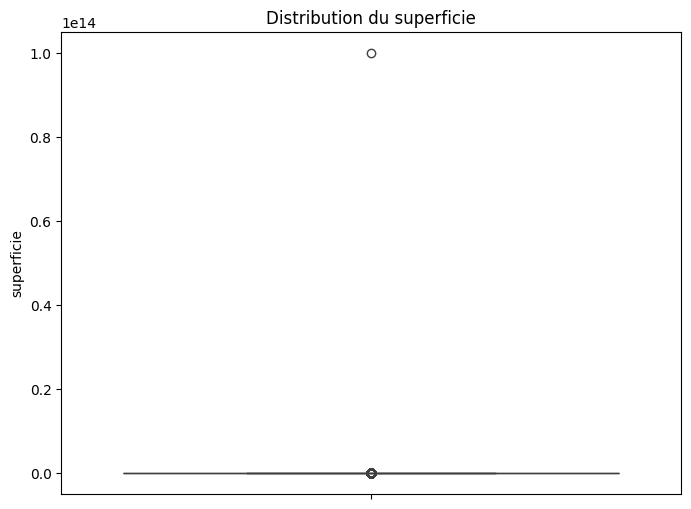

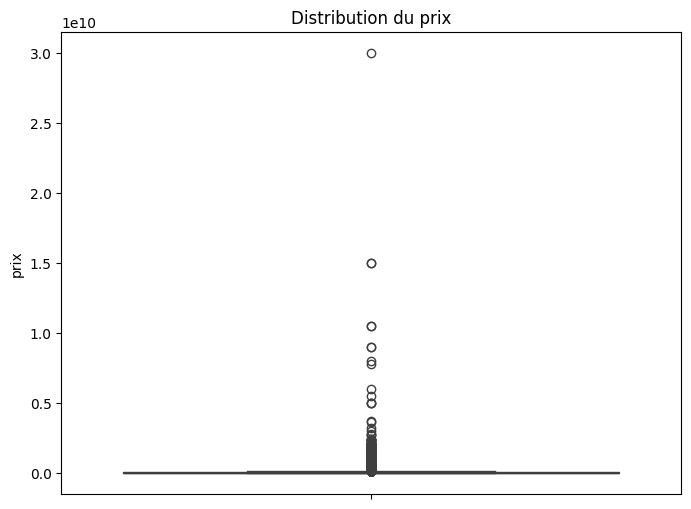

In [18]:
for col in val_num:
    plt.figure(figsize=(8,6))
    sns.boxplot(y=df[col])
    plt.title(f"Distribution du {col}")
    plt.ylabel(f"{col}")
    plt.show()

In [19]:
#gestion des valeurs abherrantes
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]


for col in val_num:
    df= remove_outliers(df, col)

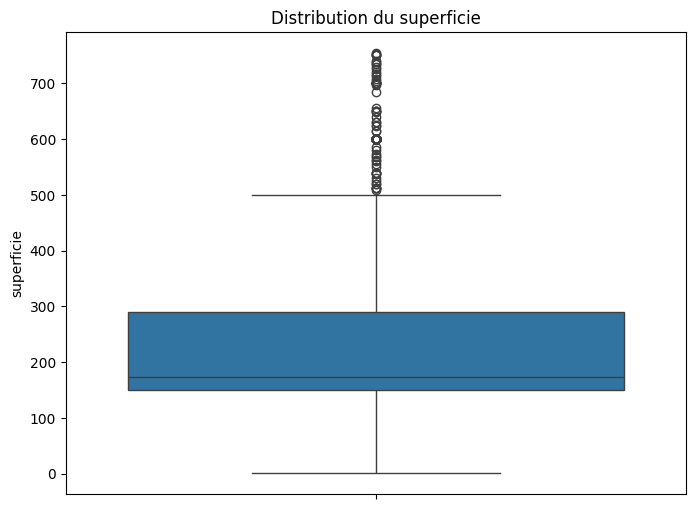

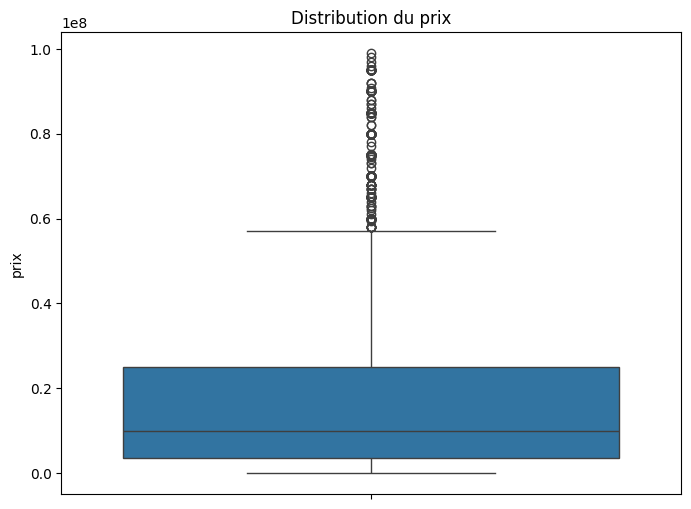

In [20]:
for col in val_num:
    plt.figure(figsize=(8,6))
    sns.boxplot(y=df[col])
    plt.title(f"Distribution du {col}")
    plt.ylabel(f"{col}")
    plt.show()

In [21]:
df.to_csv('terrains_web_cleaned.csv', index=False)